# Modern Portfolio Theory
Modern portfolio theory is a practical way of maximising expected returns, at a given level of risk. Created by Nobel Prize laureate Harry Markowitz, he argues that risk and return should not be viewed independently. By evaluating both risk and return, an investor can construct a portfolio with multi assets that will result in greater return, without an increased risk. 

The main gist of Modern Portfolio Theory is:
1. Calculate mean returns over a period for an asset
2. Calculate standard deviation (risk) of an asset over a period
3. Get the weighted sum of expected returns and risk of all assets in a portfolio
4. Repeat multiple times for different weights
5. Find the efficient frontier that maximises reward and minimises risk

In [2]:
import pandas as pd 
import pandas_datareader as pdr
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

#Portfolio Tickers
tickers = ["BTC-USD","ETH-USD","SOL-USD","AVAX-USD","LUNA-USD"]

#Download closing prices
start = dt.datetime(2021, 1, 1)
end = dt.datetime(2022, 1, 1)
data = pdr.get_data_yahoo(tickers, start, end)[["Close"]]
data.head()

Attributes         Close                                           
Symbols          BTC-USD      ETH-USD   SOL-USD  AVAX-USD  LUNA-USD
Date                                                               
2020-12-31  29001.720703   737.803406  1.510898  3.135609  0.002901
2021-01-01  29374.152344   730.367554  1.842084  3.664823  0.002937
2021-01-02  32127.267578   774.534973  1.799275  3.494940  0.002567
2021-01-03  32782.023438   975.507690  2.161752  3.472944  0.003283
2021-01-04  31971.914062  1040.233032  2.485097  3.590243  0.003197

In [3]:
#Function that generates random weights based on the number of assets
def genWeights(numAssets):
    weights = np.random.random(numAssets)
    weights = weights/np.sum(weights)
    return weights
    
#Takes in data of tickers, and calculates daily returns
def calcDailyReturns(data):
    #We will be using log returns
    dailyReturn = np.log(data["Close"].div(data["Close"].shift(1)))*100
    return dailyReturn

#Takes in daily returns of tickers, weights and returns portfolio average returns based on weights
def calcPortMeanReturn(dailyReturn,weights):
    #Calculate mean returns for each stock
    avg_rets = dailyReturn.mean()
    #Calculates the weighted sum of average returns
    port_mean = avg_rets.dot(weights)
    return port_mean

#Generates a Var-Cov Matrix to calculate risk as standard deviation
def calcRisk(dailyReturn):
    # Generate Var-Cov matrix
    cov_matrix = dailyReturn.cov()
    # Calculate portfolio standard deviation based on the weights
    # the .T tranposes the weights matrixs to dot the cov_matrix
    port_risk = np.sqrt(weights.T.dot(cov_matrix).dot(weights))
    return port_risk

In [4]:
num_assets = 5 #Define number of assets in the portfolio
num_portfolios = 10000 #Define number of randomised portfolio weights

returnsData = [] # Define an empty list to store each randomised portfolio returns
riskData = [] # Define an empty list to store each randomised portfolio risk
weightsData = [] # Define an empty list to store each randomised portfolio weights

for portfolio in range(num_portfolios):
    weights = genWeights(num_assets)
    weightsData.append(weights)
    
    dailyReturns = calcDailyReturns(data)
    returns = calcPortMeanReturn(dailyReturns,weights)
    returnsData.append(returns)
    
    risk = calcRisk(dailyReturns)
    riskData.append(risk)
#Append the list together in a dataframe
df = pd.DataFrame({"portfolio_returns":returnsData,"portfolio_risk":riskData,"portfolio_weights": weightsData})
df.head()

,portfolio_returns,portfolio_risk,portfolio_weights
0,0.866082,6.116033,"[0.08132182288067197, 0.20300059726481504, 0.3..."
1,0.611598,5.606616,"[0.17509393695736697, 0.26375999717992227, 0.1..."
2,0.520153,6.565799,"[0.1227323194023605, 0.328898365743016, 0.1533..."
3,0.566480,5.143876,"[0.2679621144772297, 0.26922638954466366, 0.18..."
4,0.614382,6.392603,"[0.23239221732246007, 0.10129752910082629, 0.3..."


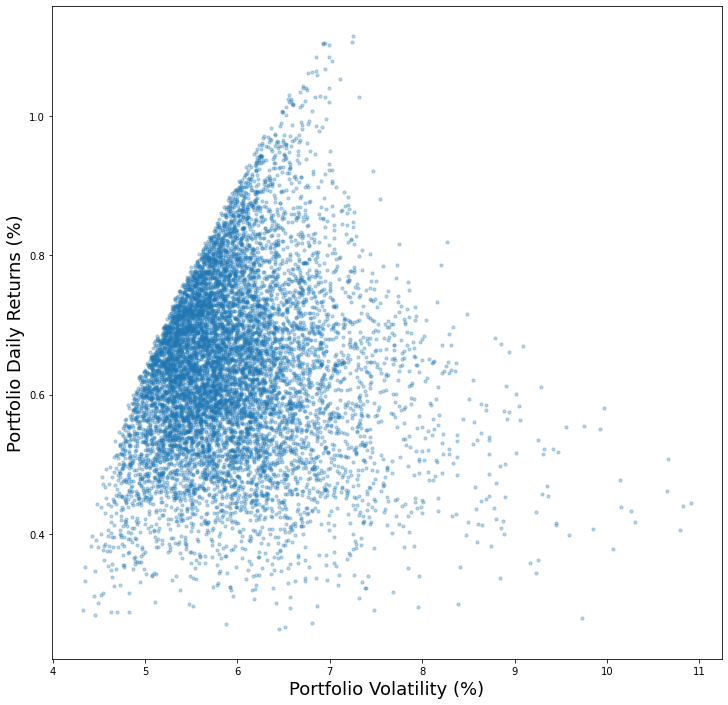

In [5]:
plt.subplots(figsize=[12,12])
plt.xlabel("Portfolio Volatility (%)",size=18)
plt.ylabel("Portfolio Daily Returns (%)",size=18)
#Plot the risk/return data
plt.scatter(df['portfolio_risk'], df['portfolio_returns'],marker='o', s=10, alpha=0.3)

[0.39693431 0.12716904 0.28051463 0.1426872  0.05269481]


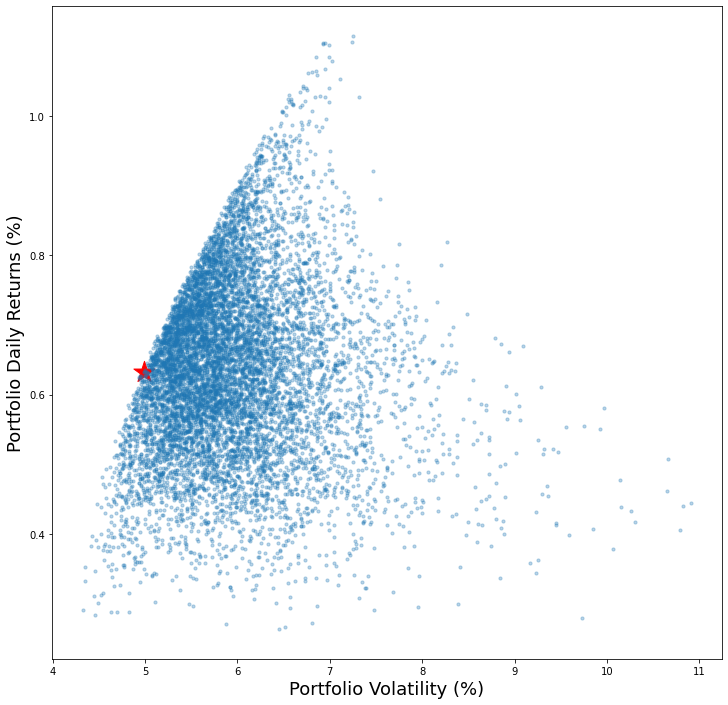

In [6]:
plt.subplots(figsize=[12,12])
plt.xlabel("Portfolio Volatility (%)",size=18)
plt.ylabel("Portfolio Daily Returns (%)",size=18)
#Finding the optimal portfolio given a risk requirement
min_vol_port = df.iloc[df[df['portfolio_risk']<5]["portfolio_returns"].idxmax()]
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)
plt.scatter(df['portfolio_risk'], df['portfolio_returns'],marker='o', s=10, alpha=0.3)
print(min_vol_port[2])